In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import os

In [2]:
# Ruta al archivo Excel
file_path = r"C:\Users\QV6522\Downloads\Definitivos\2311-Definitivo\Saldos Transmisión Zonal y Dedicado D7T 2311-def.xlsx"

# Leer el archivo Excel
try:
    df = pd.read_excel(file_path, sheet_name='Prorrata_Zonal', usecols='B:AA', skiprows=4)
    print("Archivo leído exitosamente.")
    # Aquí puedes trabajar con el DataFrame 'df'
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Archivo leído exitosamente.


In [3]:
# Filtrar por el valor "ENGIE" en la columna "PROPIETARIO"
df_engie = df[df['PROPIETARIO'] == 'ENGIE']

columnas_seleccionadas = [
    'MES', 'VATT [$]', 'VATT/12 [$]', 'VATT mensual acumulado [$]', 
    'ITE [$]', 'ITP [$]', 'Ingreso Repartición\n CT [$]', 
    'Reasignación Sistema Ingreso CT [$]', 'Saldo Mensual [$]', 
    'Saldo Mensual Ajustado por IPC [$]', 'Efectos Ajuste IPC [$]', 
    'Saldo Acumulado sin Reasignación [$]', 'Saldo Acumulado con Reasignación [$]'
]

In [4]:
# Concentra datos específicos de "ENGIE", donde los valores numéricos se han escalado por 1,000,000 y redondeado a un decimal, 
# preservando las fechas en su formato original.

df_engie_filtrado = df_engie[columnas_seleccionadas].copy()

# Convertir 'MES' a formato datetime
df_engie_filtrado['MES'] = pd.to_datetime(df_engie_filtrado['MES'])

# Columnas a convertir (excluyendo 'MES')
columnas_para_convertir = columnas_seleccionadas[1:]

# Reemplazar NaN por 0 en las columnas a convertir
df_engie_filtrado[columnas_para_convertir] = df_engie_filtrado[columnas_para_convertir].fillna(0)

# Aplicar el escalamiento y redondeo
df_engie_filtrado[columnas_para_convertir] = df_engie_filtrado[columnas_para_convertir].apply(lambda x: round(x / 1000000, 1))


In [5]:
# Encontrar la fecha más reciente
fecha_mas_reciente = df_engie_filtrado['MES'].max()

# Calcular la fecha de inicio para los últimos 12 meses
fecha_inicio = fecha_mas_reciente - pd.DateOffset(months=12)

# Filtrar para obtener solo los registros de los últimos 12 meses
df_ultimos_12 = df_engie_filtrado[(df_engie_filtrado['MES'] <= fecha_mas_reciente) & (df_engie_filtrado['MES'] > fecha_inicio)]

In [6]:
# Seleccionar las columnas
df_IngresosTotales = df_ultimos_12[['MES',
                                    'VATT/12 [$]',
                                    'ITE [$]',
                                    'ITP [$]',
                                    'Ingreso Repartición\n CT [$]',
                                    'Reasignación Sistema Ingreso CT [$]']].copy()

# Calcular la nueva columna 'IngresosTotales'
df_IngresosTotales['IngresosTotales'] = df_IngresosTotales[['ITE [$]', 
                                                            'ITP [$]', 
                                                            'Ingreso Repartición\n CT [$]',
                                                            'Reasignación Sistema Ingreso CT [$]']].sum(axis=1)

# Calcular la nueva columna 'IngresosCU' como la suma de 'Ingreso Repartición\n CT [$]' y 'Reasignación Sistema Ingreso CT [$]'
df_IngresosTotales['IngresosCU'] = df_IngresosTotales['Ingreso Repartición\n CT [$]'] + df_IngresosTotales['Reasignación Sistema Ingreso CT [$]']

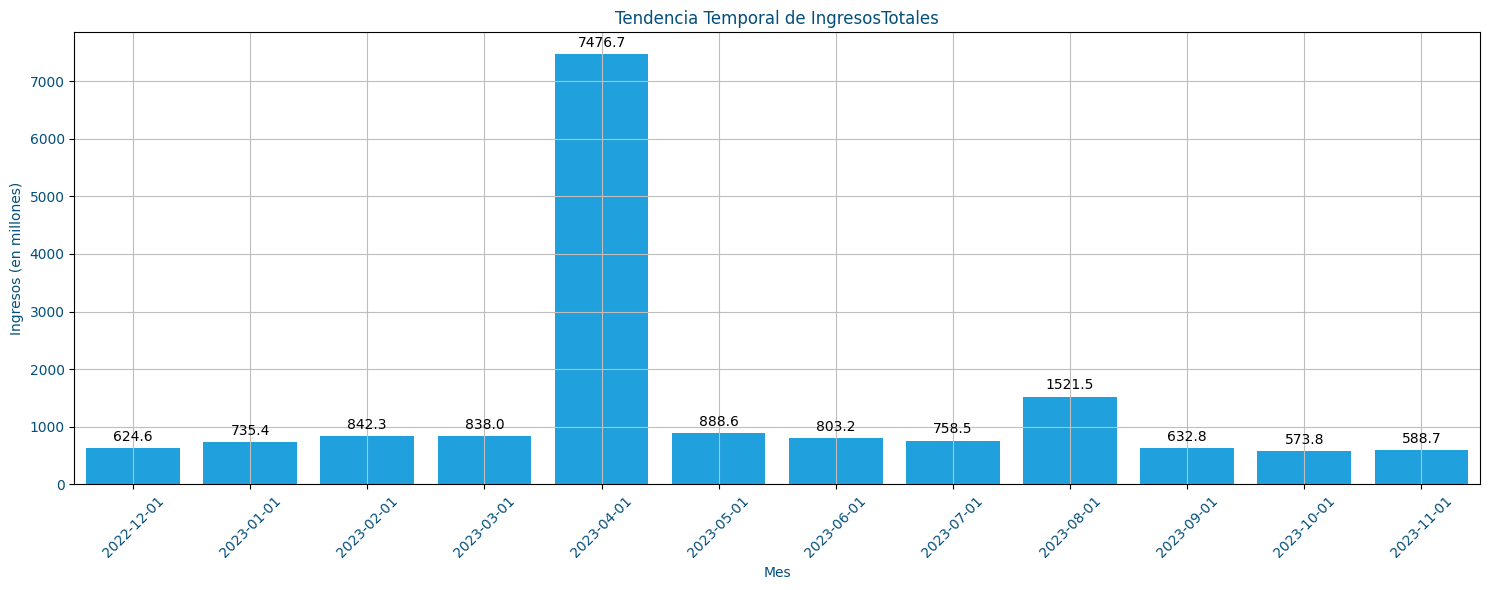

In [7]:
# Definición de la paleta de colores
colores = {
    "Azul Corporativo": "#01ACFB",
    "Turquesa": "#23D2B5",
    "Azul Oscuro": "#034E7B",
    "Verde Oliva Suave": "#A8B07A",
    "Coral Claro": "#FF8A65",
    "Gris Neutro": "#BEBEBE"
}

# Asegurarse de que 'MES' está en formato de fecha y los datos están ordenados
df_IngresosTotales['MES'] = pd.to_datetime(df_IngresosTotales['MES'])
df_IngresosTotales.sort_values('MES', inplace=True)

# Crear un gráfico de barras para IngresosTotales con la paleta de colores
plt.figure(figsize=(15, 6))
barras = sns.barplot(data=df_IngresosTotales, x='MES', y='IngresosTotales', color=colores["Azul Corporativo"])

# Agregar etiquetas de datos en cada barra
for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.1f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), ha='center', va='center',
                   xytext=(0, 8), textcoords='offset points')

# Decorar el gráfico
plt.title('Tendencia Temporal de IngresosTotales', color=colores["Azul Oscuro"])
plt.xlabel('Mes', color=colores["Azul Oscuro"])
plt.ylabel('Ingresos (en millones)', color=colores["Azul Oscuro"])
plt.xticks(rotation=45, color=colores["Azul Oscuro"])
plt.yticks(color=colores["Azul Oscuro"])
plt.grid(True, color=colores["Gris Neutro"])
plt.tight_layout()

# Mostrar el gráfico
plt.show()


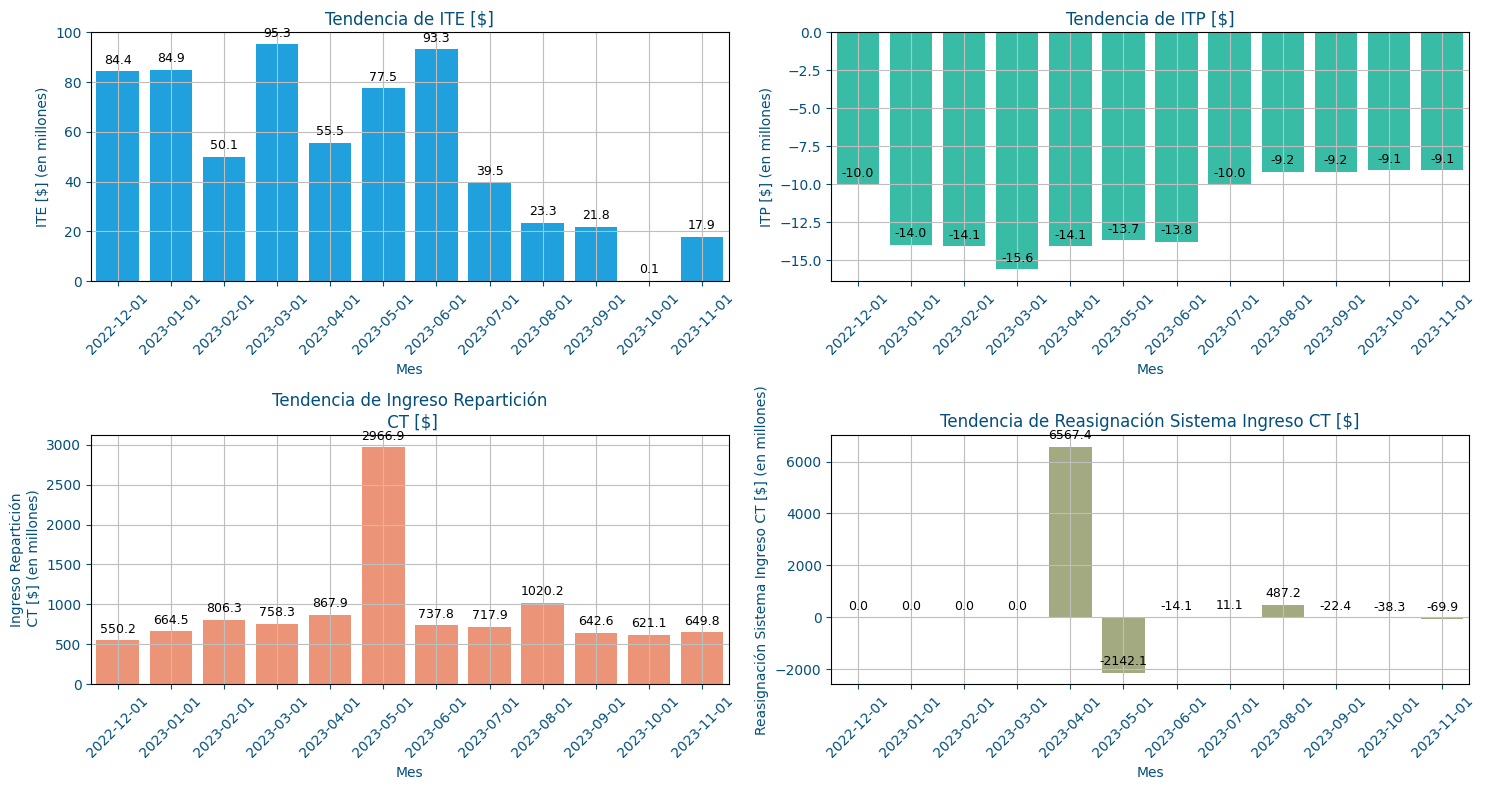

In [8]:
df_IngresosTotales['MES'] = pd.to_datetime(df_IngresosTotales['MES'])

# Definición de la paleta de colores
colores = {
    "Azul Corporativo": "#01ACFB",
    "Turquesa": "#23D2B5",
    "Azul Oscuro": "#034E7B",
    "Verde Oliva Suave": "#A8B07A",
    "Coral Claro": "#FF8A65",
    "Gris Neutro": "#BEBEBE"
}

# Componentes de IngresosTotales
componentes = ['ITE [$]', 'ITP [$]', 'Ingreso Repartición\n CT [$]', 'Reasignación Sistema Ingreso CT [$]']

# Crear una figura para los subgráficos en una cuadrícula 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Aplanar el array de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Formato de fecha para el eje X
date_form = mdates.DateFormatter("%b-%y")

# Iterar sobre cada componente para crear un subgráfico
colores_graficos = ["Azul Corporativo", "Turquesa", "Coral Claro", "Verde Oliva Suave"]
for i, comp in enumerate(componentes):
    barplot = sns.barplot(data=df_IngresosTotales, x='MES', y=comp, ax=axes[i], color=colores[colores_graficos[i]])
    
    # Agregar etiquetas de valores en cada barra
    for bar in barplot.patches:
        barplot.annotate(format(bar.get_height(), '.1f'), 
                         (bar.get_x() + bar.get_width() / 2, 
                          bar.get_height()), ha='center', va='center',
                         size=9, xytext=(0, 8),
                         textcoords='offset points')
    
    axes[i].set_title(f'Tendencia de {comp}', color=colores["Azul Oscuro"])
    axes[i].set_ylabel(f'{comp} (en millones)', color=colores["Azul Oscuro"])
    axes[i].set_xlabel('Mes', color=colores["Azul Oscuro"])
    axes[i].tick_params(axis='x', rotation=45, colors=colores["Azul Oscuro"])
    axes[i].tick_params(axis='y', colors=colores["Azul Oscuro"])
    axes[i].grid(True, color=colores["Gris Neutro"])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()